In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("datasets_supermarket_sales.csv")

In [3]:
df.shape

(1000, 17)

In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [6]:
df.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'Rating'],
      dtype='object')

In [7]:
df.rename(columns={'Tax_5%':'Tax_5perc','cogs':'Cogs', 'gross_margin_percentage':'Gross_mar_p', 'gross_income':'Gross_Inc'},inplace=True)

In [8]:
df.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5perc', 'Total', 'Date',
       'Time', 'Payment', 'Cogs', 'Gross_mar_p', 'Gross_Inc', 'Rating'],
      dtype='object')

In [9]:
df.isnull().sum()

Invoice_ID       0
Branch           0
City             0
Customer_type    0
Gender           0
Product_line     0
Unit_price       0
Quantity         0
Tax_5perc        0
Total            0
Date             0
Time             0
Payment          0
Cogs             0
Gross_mar_p      0
Gross_Inc        0
Rating           0
dtype: int64

In [10]:
df.describe()

,Unit_price,Quantity,Tax_5perc,Total,Cogs,Gross_mar_p,Gross_Inc,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [11]:
def outlier(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print (lower_range,upper_range)
    plt.hist(datacolumn)
    plt.show()

In [12]:
# Invoice ID

In [13]:
import re
rex = re.compile("^[0-9]{3}-[0-9]{2}-[0-9]{4}$")
for a in df["Invoice_ID"]:
    if rex.match(a) is None:
        print("True")

In [14]:
# Format of invoice id checked

In [15]:
df.Invoice_ID.nunique()

1000

In [16]:
# Branch

In [17]:
df.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [18]:
# There are supposed to be 3 Branches. Therefore checked!

In [19]:
# Almost equal number for each type.

In [20]:
# City

In [21]:
df.City.nunique()

3

In [22]:
df.City.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [23]:
# Branch and City correspond to each other

In [24]:
df['Test'] = df['City'] + df['Branch']

In [25]:
df.Test.nunique()

3

In [26]:
df.Test.value_counts()

YangonA       340
MandalayB     332
NaypyitawC    328
Name: Test, dtype: int64

In [27]:
df.drop(['Test'],inplace=True,axis=1)

In [28]:
# Customer Type

In [29]:
df.Customer_type.nunique()

2

In [30]:
df.Customer_type.value_counts()

Member    501
Normal    499
Name: Customer_type, dtype: int64

In [31]:
# Gender

In [32]:
df.Gender.nunique()

2

In [33]:
df.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [34]:
# Product line

In [35]:
df.Product_line.nunique()

6

In [36]:
df.Product_line.value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product_line, dtype: int64

In [37]:
# Unit Price

In [38]:
df.Unit_price.describe()

count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: Unit_price, dtype: float64

-34.715 145.525


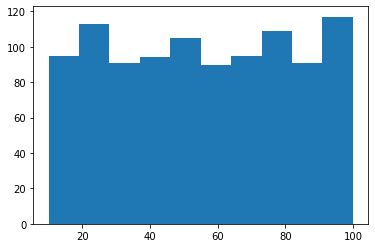

In [39]:
outlier(df.Unit_price)

In [40]:
# the range of actual figures is very much inside the one we got statistically
# No outliers

In [41]:
# Quantity

In [42]:
df.Quantity.describe()

count    1000.000000
mean        5.510000
std         2.923431
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Quantity, dtype: float64

In [43]:
for a in df['Quantity']:
    if(a%1 !=0):
        print (a)

-4.5 15.5


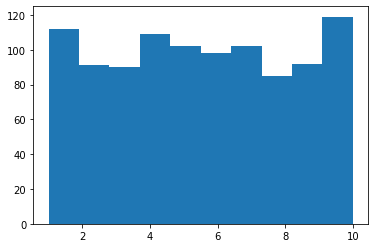

In [44]:
outlier(df['Quantity'])

In [45]:
# Within the range, no outliers

In [46]:
# Tax 5 %

In [47]:
df.Tax_5perc.describe()

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: Tax_5perc, dtype: float64

-18.855687499999995 47.22581249999999


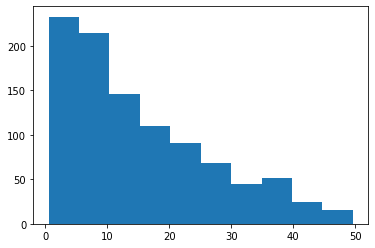

In [48]:
outlier(df.Tax_5perc)

In [49]:
df[df.Tax_5perc > 47.2258]

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5perc,Total,Date,Time,Payment,Cogs,Gross_mar_p,Gross_Inc,Rating
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.8,4.761905,48.690,4.4


In [50]:
# The values are very close to the upper range
# Hence, I am not removing them!

In [51]:
df['test1']= (df.Unit_price * df.Quantity) + df.Tax_5perc

In [52]:
df['test2']= df.test1-df.Total

In [53]:
df.test2=df.test2.round()

In [54]:
df.test2.describe()

count    1000.0
mean        0.0
std         0.0
min        -0.0
25%         0.0
50%         0.0
75%        -0.0
max        -0.0
Name: test2, dtype: float64

In [55]:
df.drop(['test1','test2'],inplace=True,axis=1)

In [56]:
# Date

In [57]:
df.Date.describe()

count         1000
unique          89
top       2/7/2019
freq            20
Name: Date, dtype: object

In [58]:
df.Date=pd.to_datetime(df.Date,format='%m/%d/%Y')

In [59]:
# Time

In [60]:
import re
rex = re.compile("^[0-2]{1}[0-9]{1}:[0-9]{2}$")
for a in df["Time"]:
    if rex.match(a) is None:
        print("True")

In [61]:
new_df = df["Time"].str.split(":", n=1, expand = True).rename({0: 'Hours', 1: 'Mins'}, axis=1)

In [62]:
for a in new_df.Hours:
    if (int(a) >23):
        print(a)

In [63]:
for a in new_df.Mins:
    if (int(a) >60):
        print(a)

In [64]:
# Checked

In [65]:
# Payment

In [66]:
df.Payment.nunique()

3

In [67]:
df.Payment.value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [68]:
# Cogs

In [69]:
df.Cogs.describe()

count    1000.00000
mean      307.58738
std       234.17651
min        10.17000
25%       118.49750
50%       241.76000
75%       448.90500
max       993.00000
Name: Cogs, dtype: float64

-377.11375000000004 944.5162500000001


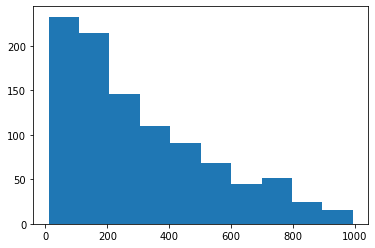

In [70]:
outlier(df.Cogs)

In [71]:
df= df[df.Cogs <= 944.5162]

In [72]:
# Gross margin percentage

In [73]:
df.Gross_mar_p.nunique()

1

In [74]:
df.drop(['Gross_mar_p'],inplace=True,axis=1)

In [75]:
# Gross income

In [76]:
df.Gross_Inc.describe()

count    991.000000
mean      15.076417
std       11.319504
min        0.508500
25%        5.817500
50%       12.036000
75%       22.127000
max       45.325000
Name: Gross_Inc, dtype: float64

-18.646749999999997 46.59125


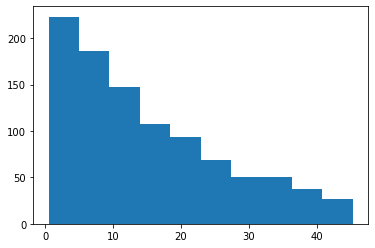

In [77]:
outlier(df.Gross_Inc)

In [78]:
df[df.Gross_Inc > 47.22]

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5perc,Total,Date,Time,Payment,Cogs,Gross_Inc,Rating


In [79]:
# rating

In [80]:
df.Rating

0      9.1
1      9.6
2      7.4
3      8.4
4      5.3
      ... 
994    5.9
995    6.2
997    7.7
998    4.1
999    6.6
Name: Rating, Length: 991, dtype: float64

In [81]:
df.Rating.describe()

count    991.000000
mean       6.979717
std        1.716957
min        4.000000
25%        5.500000
50%        7.000000
75%        8.500000
max       10.000000
Name: Rating, dtype: float64

1.0 13.0


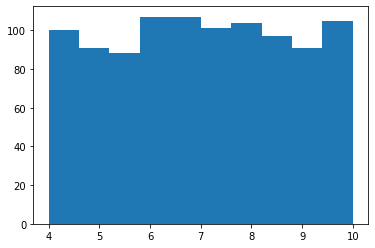

In [82]:
outlier(df.Rating)

In [83]:
# Within the range

In [84]:
df.to_csv("cleaned supermarkksales.csv")